### Instalación de los paquetes necesarios:

In [1]:
! pip install pandas
! pip install regex
! pip install matplotlib
! pip install emoji
! pip install plotly
! pip install nltk
! pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importado de paquetes

In [2]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import plotly.express as px
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Cargar los datos

In [3]:
data_path = 'data/chat_clase.txt'

# Expresión regular para identificar líneas con mensajes de texto del grupo
patron_mensaje = re.compile(r'^(\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}) - (.+?): (.+)$')

# Listas para almacenar los campos
dates = []
times = []
authors = []
messages = []

# Lectura de los datos del archivo txt
with open(data_path, 'r', encoding='utf8') as file:
    lines = file.readlines()

# Procesar cada línea del archivo y extraer los mensajes de los miembros del grupo
for line in lines:
    match = patron_mensaje.match(line)
    if match:
        datetime = match.group(1)
        author = match.group(2)
        message = match.group(3)
        
        # Separar la fecha y la hora
        date, time = datetime.split(', ')
        
        # Agregar los campos a las listas
        dates.append(date)
        times.append(time)
        authors.append(author)
        messages.append(message)

# Crear el DataFrame usando pandas
data = {
    'Date': dates,
    'Time': times,
    'Author': authors,
    'Message': messages
}

dataframe = pd.DataFrame(data)
dataframe

,Date,Time,Author,Message
0,24/10/23,13:00,Maria Uni,https://www.instagram.com/p/Cyx0I1oIJsq/?igshi...
1,24/10/23,13:00,Maria Uni,Alguien se apunta
2,24/10/23,13:00,Maria Uni,??
3,24/10/23,13:15,Aingeru Uni,Yo había pensado
4,24/10/23,13:15,Aingeru Uni,Son 15km eh
...,...,...,...,...
1841,30/11/23,14:13,Maider Uni,me repites ese numerin?
1842,30/11/23,14:21,Nagore Uni,Jajajjaa descripción as
1843,30/11/23,14:21,Nagore Uni,Yo en Word
1844,1/12/23,12:49,Maitane Uni,@34661748789 he visto a tu madre


### Estadísticas generales

In [4]:
# Número total de mensajes
total_msg = len(dataframe['Message'])

# Número total de archivos multimedia
total_multimedia = len(dataframe[dataframe['Message'] == '<Multimedia omitido>'])

# Número de mensajes por usuario
user_msg = Counter(dataframe['Author'].values)

# Número de archivos multimedia por usuario
user_multimedia = Counter(dataframe[dataframe['Message'] == '<Multimedia omitido>']['Author'].values)

# Printear los resultados

print('####### NUMERO DE MENSAJES EN TOTAL #######\n')

print(str(total_msg) + ' mensajes en total')

print('\n####### NUMERO DE ARCHIVOS MULTIMEDIA EN TOTAL #######\n')

print(str(total_multimedia) + ' archivos multimedia en total')

print('\n####### NUMERO DE MENSAJES POR USUARIO #######\n')

for user, num_messages in user_msg.items():
    print(f"{user}: {num_messages} mensajes")

print('\n####### NUMERO DE ARCHIVOS MULTIMEDIA POR USUARIO #######\n')

for user, num_multimedia in user_multimedia.items():
    print(f"{user}: {num_multimedia} archivos multimedia")


####### NUMERO DE MENSAJES EN TOTAL #######

1846 mensajes en total

####### NUMERO DE ARCHIVOS MULTIMEDIA EN TOTAL #######

109 archivos multimedia en total

####### NUMERO DE MENSAJES POR USUARIO #######

Maria Uni: 263 mensajes
Aingeru Uni: 68 mensajes
Sergio Martin: 132 mensajes
Maitane Uni: 303 mensajes
Maider Uni: 249 mensajes
Oier Uni: 70 mensajes
Nagore Uni: 283 mensajes
Ainoa Uni: 197 mensajes
Liam Uni: 195 mensajes
Gorka Uni: 31 mensajes
Alaia Uni: 24 mensajes
Malena No Uni: 31 mensajes

####### NUMERO DE ARCHIVOS MULTIMEDIA POR USUARIO #######

Maider Uni: 17 archivos multimedia
Nagore Uni: 12 archivos multimedia
Maitane Uni: 21 archivos multimedia
Alaia Uni: 6 archivos multimedia
Gorka Uni: 3 archivos multimedia
Liam Uni: 21 archivos multimedia
Ainoa Uni: 9 archivos multimedia
Malena No Uni: 5 archivos multimedia
Maria Uni: 2 archivos multimedia
Oier Uni: 12 archivos multimedia
Sergio Martin: 1 archivos multimedia


In [5]:
# Gráfico de barras para el número de mensajes por usuario
users = list(user_msg.keys())
messages = list(user_msg.values())

fig1 = px.bar(x=users, y=messages, labels={'x': 'Usuarios', 'y': 'Número de Mensajes'})
fig1.update_layout(title='Número de Mensajes por Usuario', xaxis_tickangle=-45)
fig1.show()

# Gráfico de barras para el número de archivos multimedia por usuario
users_media = list(user_multimedia.keys())
media_count = list(user_multimedia.values())

fig2 = px.bar(x=users_media, y=media_count, labels={'x': 'Usuarios', 'y': 'Número de Archivos Multimedia'})
fig2.update_layout(title='Número de Archivos Multimedia por Usuario', xaxis_tickangle=-45)
fig2.show()

### Análisis emojis

In [6]:
def find_emojis(text):
    return [e['emoji'] for e in emoji.emoji_list(text)]

In [7]:
dataframe['Emojis'] = dataframe['Message'].apply(find_emojis)

# Todos los emojis presentes en el chat
all_emojis = sum(dataframe['Emojis'], [])

# Frecuencia de cada emoji
emoji_counts = Counter(pd.Series(all_emojis).values)

data = {'Emojis': list(emoji_counts.keys()), 'Frecuencia': list(emoji_counts.values())}
df = pd.DataFrame(data)

df = df.sort_values(by='Frecuencia', ascending=False)
top_emojis = df.head(5)

fig = px.pie(top_emojis, values='Frecuencia', names='Emojis', title='Distribución de frecuencia de los 10 emojis más utilizados')
fig.update_traces(textinfo='percent+label')
fig.show()


In [8]:
author_emojis = dataframe.groupby('Author')['Emojis'].apply(lambda x: [emoji for sublist in x for emoji in sublist])
author_emoji_counts = author_emojis.apply(Counter)
top_emojis_by_author = author_emoji_counts.apply(lambda x: dict(x.most_common(5)))

for author, emojis in top_emojis_by_author.items():
    emojis_df = pd.DataFrame({'Emojis': list(emojis.keys()), 'Frecuencia': list(emojis.values())})
    fig = px.bar(emojis_df, x='Emojis', y='Frecuencia', title=f'Emojis más utilizados por {author}', labels={'Frecuencia': 'Frecuencia de Uso'})
    fig.show()


### Análisis de palabras

In [9]:
def remove_variations_of_jaja(text):
    return re.sub(r'\b[ja]+\b', '', text, flags=re.IGNORECASE)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sergio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sergio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


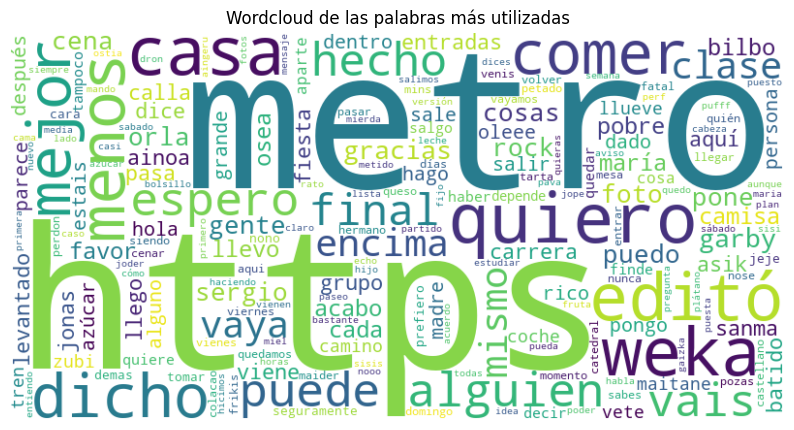

In [10]:
# Descargar stopwords si no las tienes
nltk.download('stopwords')
nltk.download('punkt')

# Tokenización y limpieza de texto
text = ' '.join(dataframe['Message'].tolist())  # Unir todos los mensajes en un solo texto
text = remove_variations_of_jaja(text)
tokens = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas

# Eliminar stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))  # Usando stopwords en español
stop_words.update(['multimedia', 'omitido', 'pues', 'igual', 'voy', 'ver', 'null', 'ahora', 'mañana', 'luego', 'vamos', 'creo', 'bien', 'tarde', 'bueno', 'hacer', 'hora', 'tiempo', 'vale', 'sino', 'esque', 'digo', 'entonces', 'hace', 'verdad', 'solo'])
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 3]

# Contar la frecuencia de palabras
word_freq = Counter(filtered_tokens)

# Obtener las palabras más utilizadas (sin stopwords)
top_words = word_freq.most_common(100000)  # Puedes cambiar el número para obtener más palabras

# Crear un diccionario de las palabras y su frecuencia para el wordcloud
wordcloud_dict = {word: freq for word, freq in top_words}

# Generar el wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Mostrar el wordcloud utilizando Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.title('Wordcloud de las palabras más utilizadas')
plt.show()

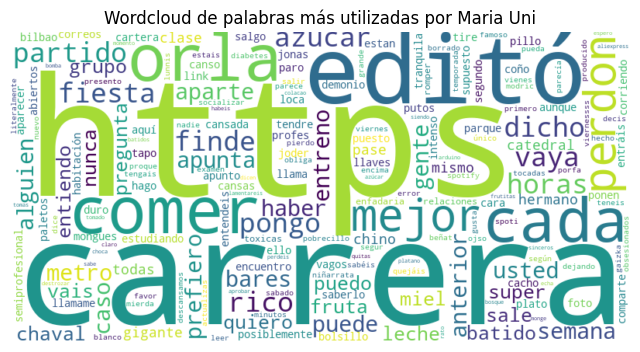

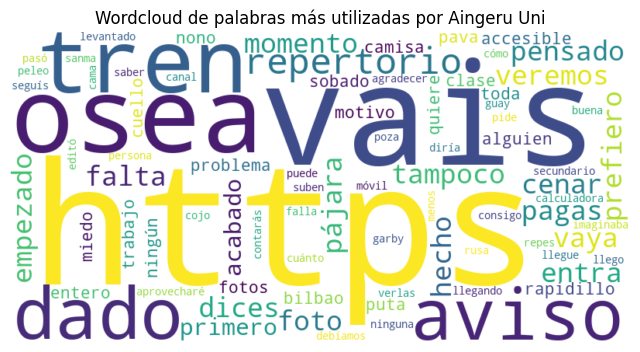

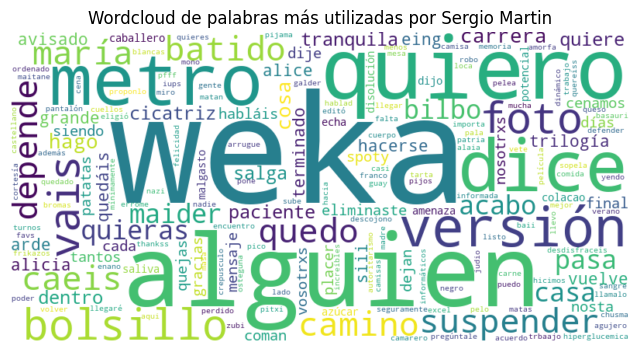

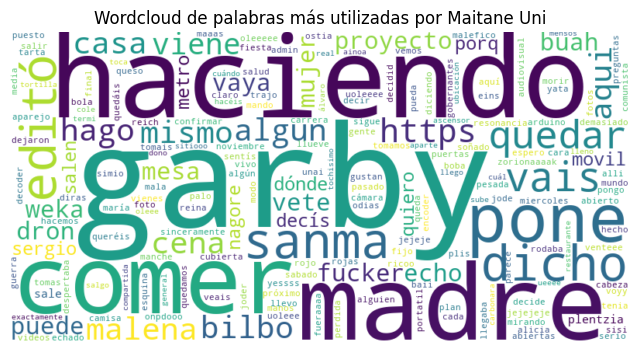

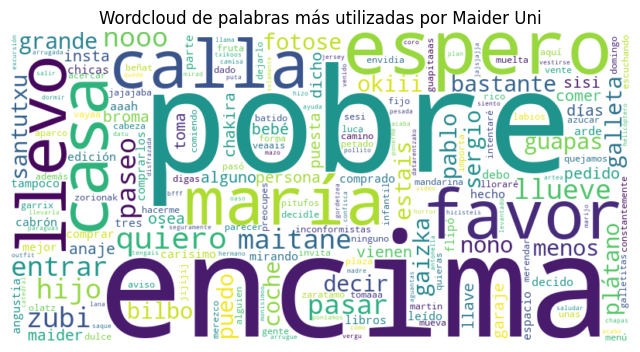

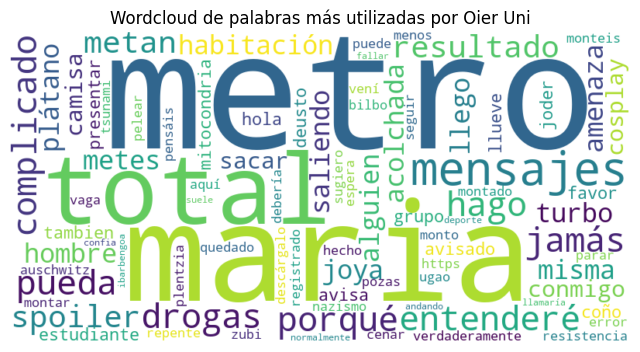

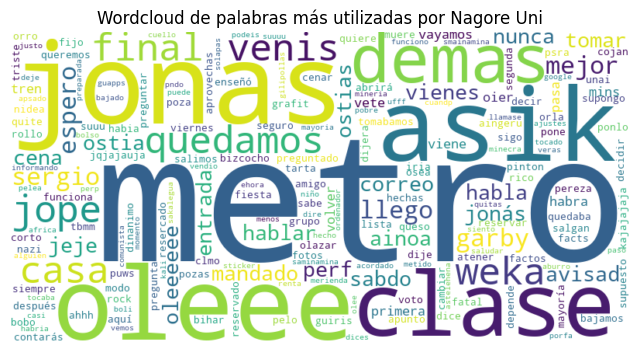

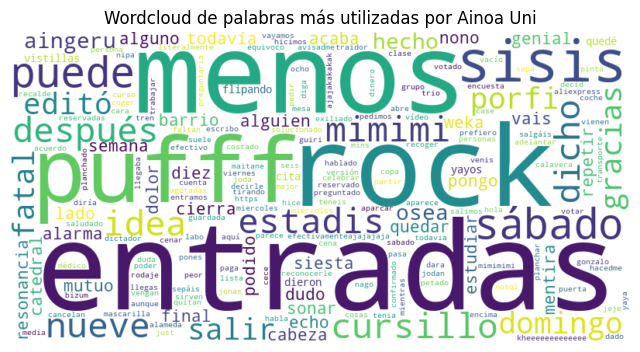

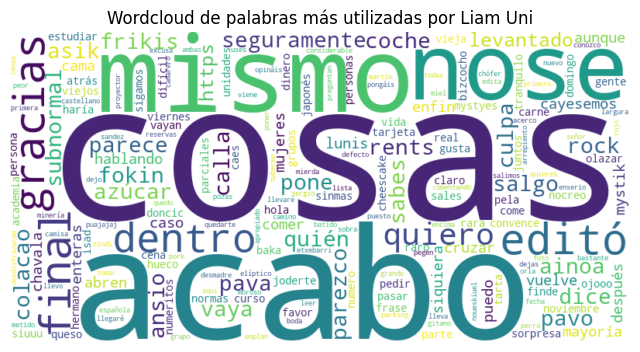

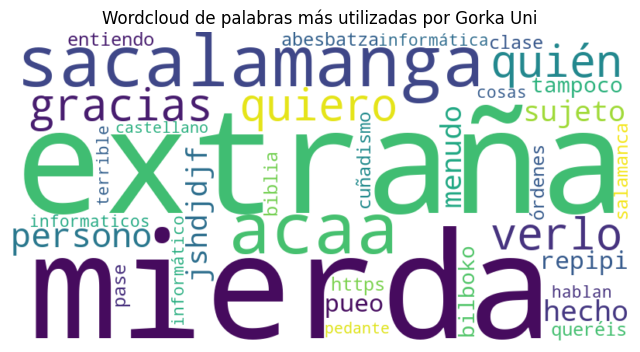

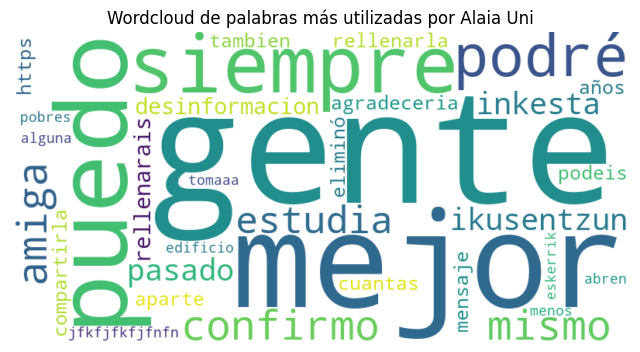

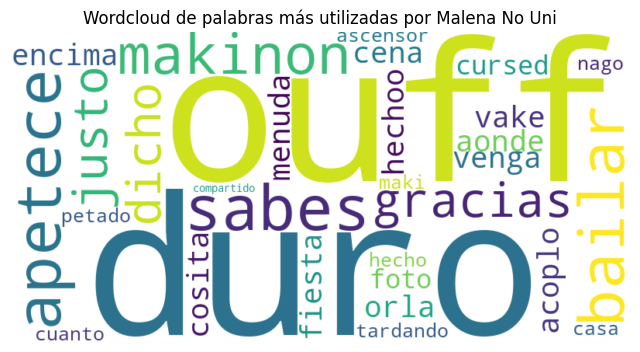

In [11]:
# Obtener la lista de usuarios únicos
unique_users = dataframe['Author'].unique()

# Generar wordclouds para cada usuario
for user in unique_users:
    user_data = dataframe[dataframe['Author'] == user]  # Filtrar datos por usuario
    user_text = ' '.join(user_data['Message'].tolist())  # Unir mensajes del usuario en un solo texto
    user_text = remove_variations_of_jaja(user_text)
    
    # Tokenizar y convertir a minúsculas
    tokens = word_tokenize(user_text.lower())

    # Usar stopwords en español y agregar palabras personalizadas
    stop_words = set(stopwords.words('spanish'))
    stop_words.update(['multimedia', 'omitido', 'pues', 'igual', 'voy', 'ver', 'null', 'ahora', 'mañana', 'luego', 'vamos', 'creo', 'bien', 'tarde', 'bueno', 'hacer', 'hora', 'tiempo', 'vale', 'sino', 'esque', 'digo', 'entonces', 'hace', 'verdad', 'solo'])

    # Filtrar palabras por longitud mayor a dos caracteres y no estar en la lista de stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 3]

    # Contar la frecuencia de palabras
    word_freq = Counter(filtered_tokens)

    # Generar el wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Mostrar el wordcloud utilizando Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Desactivar ejes
    plt.title(f'Wordcloud de palabras más utilizadas por {user}')
    plt.show()